## Prédiction de prix d'une automobile

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('annonces_auto.csv')

In [4]:

df.head()

,marque,version,annee,kilometrage,energie,emission_C02,consommation_mixte,transmission,portes,puissance_fiscale,places,lieu,prix
0,Volkswagen,Tiguan 2.0 TDI 150 DSG7 4Motion Black R-Line,2019.0,24000.0,Diesel,133.0,NaN,Automatique,4.0,8.0,5.0,09400,29500.0
1,Renault,Laguna 1.9 DTI RTE,1999.0,320000.0,Diesel,NaN,5.5,Manuelle,4.0,6.0,5.0,28400,2000.0
2,Citroën,2 CV 6 Special,1986.0,96700.0,Essence,NaN,NaN,Manuelle,4.0,3.0,5.0,31250,12000.0
3,TOYOTA,Edition 1.8 hybrid 122ch,2022.0,10.0,Hybride,NaN,NaN,Automatique,4.0,5.0,NaN,NaN,27470.0
4,Volkswagen,Coccinelle Cabriolet 2.0 TDI 150 BMT Club,2015.0,92600.0,Diesel,118.0,4.6,Manuelle,2.0,8.0,4.0,91830,18100.0


In [5]:
for lab in df.keys():
    if (len(df[lab].unique())<11):
        print(lab , " : ", df[lab].unique())

energie  :  ['Diesel' 'Essence' 'Hybride' 'Autres' nan 'GPL ou GNL']
transmission  :  ['Automatique' 'Manuelle' 'Semi automatique' nan]
portes  :  [ 4.  2. nan]
places  :  [ 5. nan  4.  2.  7.  8.  6.  9.]


In [6]:
df.keys()

Index(['marque', 'version', 'annee', 'kilometrage', 'energie', 'emission_C02',
       'consommation_mixte', 'transmission', 'portes', 'puissance_fiscale',
       'places', 'lieu', 'prix'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marque              594 non-null    object 
 1   version             585 non-null    object 
 2   annee               592 non-null    float64
 3   kilometrage         590 non-null    float64
 4   energie             591 non-null    object 
 5   emission_C02        471 non-null    float64
 6   consommation_mixte  461 non-null    float64
 7   transmission        592 non-null    object 
 8   portes              591 non-null    float64
 9   puissance_fiscale   580 non-null    float64
 10  places              587 non-null    float64
 11  lieu                590 non-null    object 
 12  prix                592 non-null    float64
dtypes: float64(8), object(5)
memory usage: 60.5+ KB


In [8]:
df.isnull().sum()

marque                  0
version                 9
annee                   2
kilometrage             4
energie                 3
emission_C02          123
consommation_mixte    133
transmission            2
portes                  3
puissance_fiscale      14
places                  7
lieu                    4
prix                    2
dtype: int64

### EDA

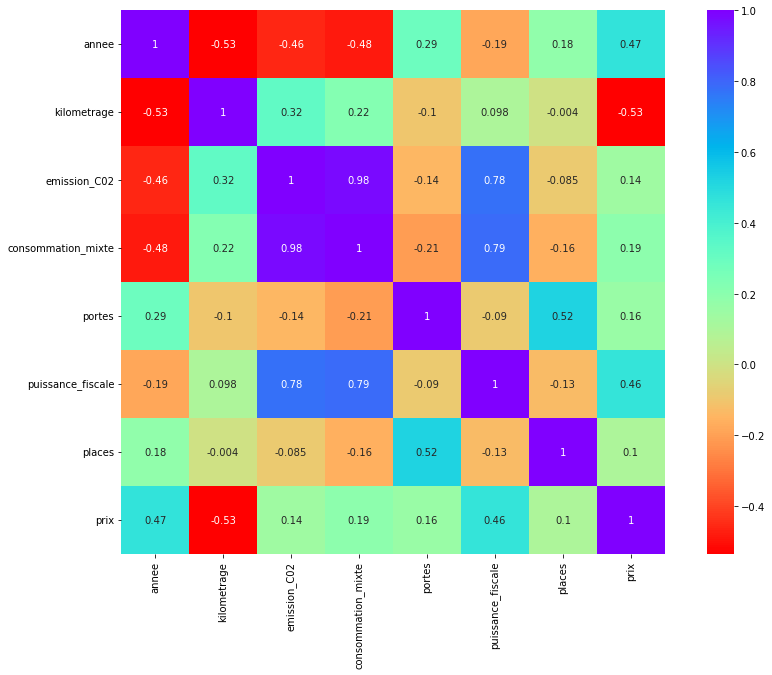

In [9]:
plt.subplots(figsize=(15,10))
sns_plot = sns.heatmap(df.corr(),annot =True,cmap='rainbow_r',square=True)
fig = sns_plot.get_figure()
fig.savefig("corrHeatmap.png")

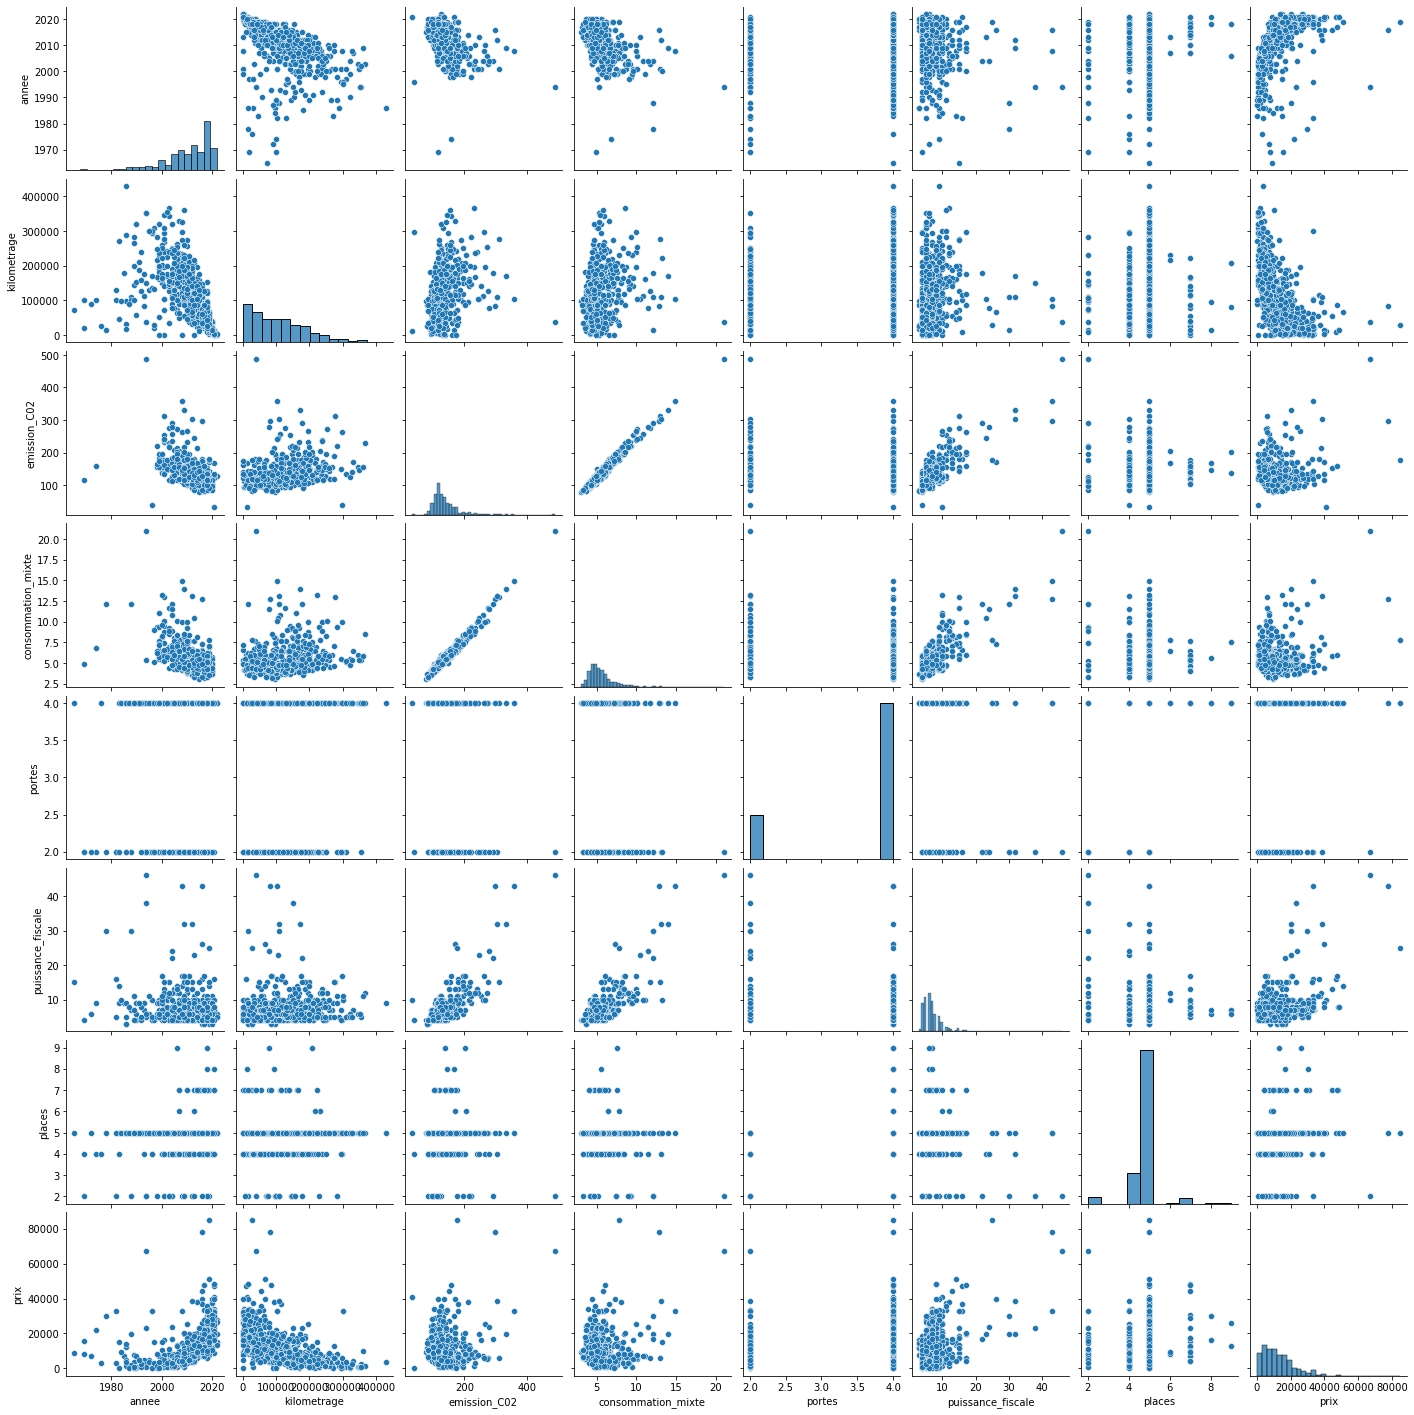

In [10]:
sns.pairplot(df)

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


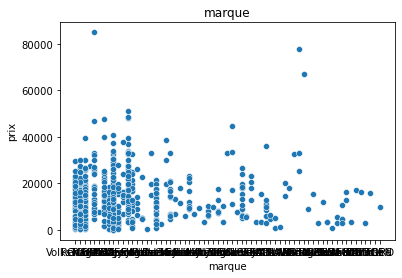

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


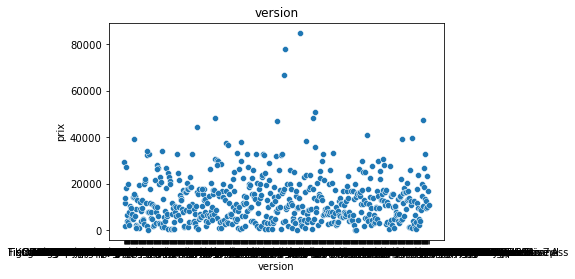

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


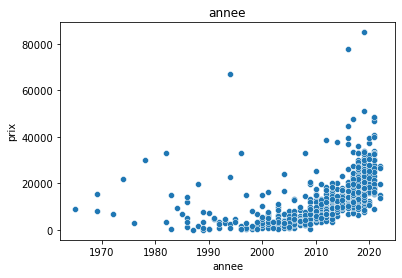

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


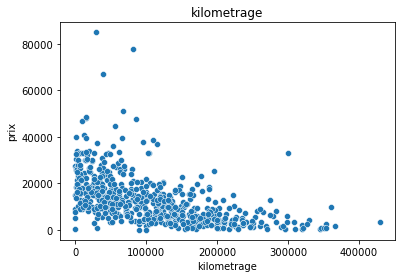

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


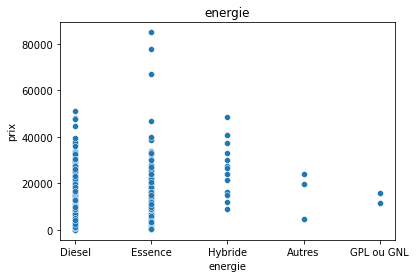

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


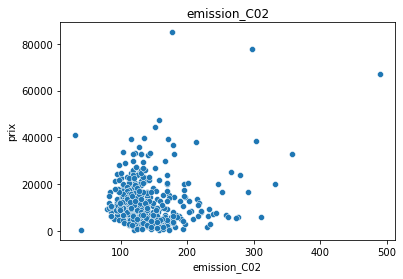

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


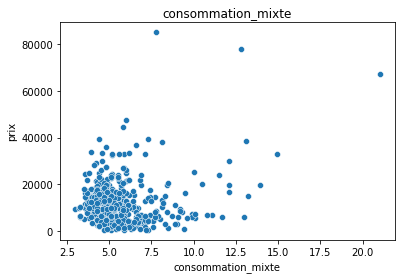

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


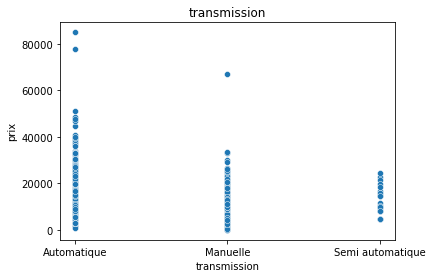

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


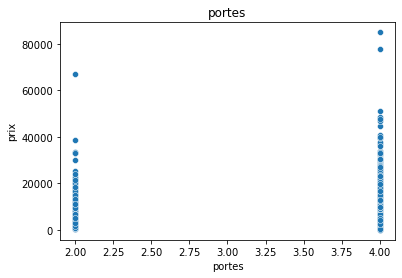

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


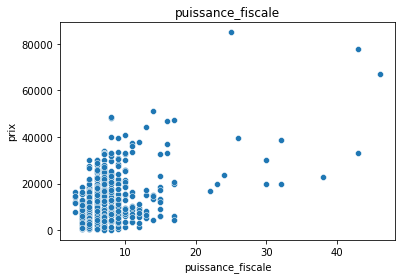

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


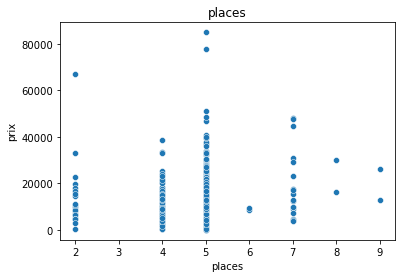

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


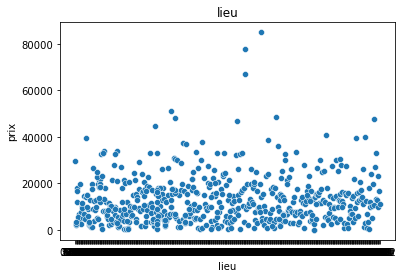

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


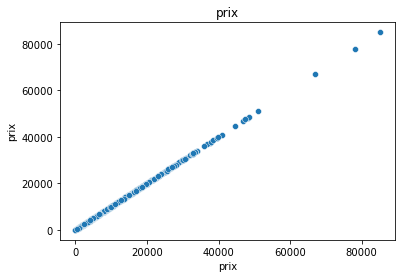

In [11]:
for i in df.keys():
    plt.title(i)
    sns.scatterplot(df[i],df['prix'])
    plt.show()

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='prix', ylabel='Density'>

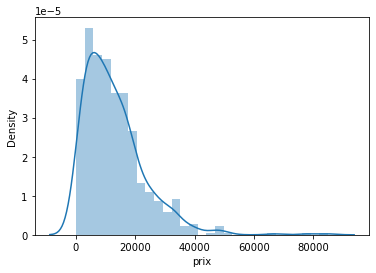

In [12]:
sns.distplot(df['prix'])

In [13]:
df.columns

Index(['marque', 'version', 'annee', 'kilometrage', 'energie', 'emission_C02',
       'consommation_mixte', 'transmission', 'portes', 'puissance_fiscale',
       'places', 'lieu', 'prix'],
      dtype='object')

In [14]:
from  feature_engine.encoding import OneHotEncoder

encoder = OneHotEncoder(variables=['energie', 'transmission','marque'])

# fit the encoder
df2 = encoder.fit_transform( df.drop(['version','emission_C02','consommation_mixte', 'lieu'], axis=1).dropna() )


In [15]:
df2[['annee', 'kilometrage',	'portes', 'puissance_fiscale', 'places', 'prix']] = df2[['annee', 'kilometrage', 'portes', 'puissance_fiscale', 'places', 'prix']].astype(int)



In [16]:
df2

,annee,kilometrage,portes,puissance_fiscale,places,prix,energie_Diesel,energie_Essence,energie_Hybride,energie_Autres,...,marque_Subaru,marque_Saab,marque_RENAULT,marque_Smart,marque_Abarth,marque_JAGUAR,marque_KIA,marque_Mitsubishi,marque_Trafic,marque_FORD
0,2019,24000,4,8,5,29500,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1999,320000,4,6,5,2000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1986,96700,4,3,5,12000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015,92600,2,8,4,18100,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2008,173300,4,8,5,4000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
589,2015,130000,4,8,5,12800,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
590,2015,177200,4,15,4,23199,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
591,2018,42000,4,5,5,9990,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
592,2016,61500,4,7,5,16900,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##  Linear Regression

#### Self Analysis based feature

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.api as sm

In [18]:
y = df2['prix']
X = df2.drop(['prix'], axis=1)

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [20]:
LR = LinearRegression()

In [21]:
LR.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = LR.predict(X_test)

In [23]:
r2_score(y_pred,y_test)

0.4924183779442055

In [24]:
print('Coefficient are',LR.coef_)
print('intercept is',LR.intercept_)

Coefficient are [ 2.47926138e+02 -5.92401774e-02 -2.42809281e+02  8.35359309e+02
  1.53990005e+03 -8.78555369e+02 -2.60440373e+03  1.04460332e+03
  4.13087051e+03 -1.69251473e+03  2.98634171e+03 -1.77412238e+03
 -1.21221933e+03  1.55184926e+03 -1.47937952e+03  5.96180629e+02
  2.16501613e+03  2.75393163e+03 -7.97831269e+02 -3.95157024e+02
 -2.65969693e+03  2.39893867e+03  2.67176964e+03 -2.16734033e+03
 -1.40636252e+03 -9.91808224e+03  4.66895100e+03 -6.98471469e+03
 -2.67961918e+03 -9.29621820e-08 -1.25458245e+03  9.66039742e+02
 -4.89457605e+03 -4.07620886e+02  3.98704287e-08 -2.98493770e+03
  1.01936166e-07 -7.88559420e+03  2.07595804e-07 -4.59335432e+02
 -4.51101441e+03 -1.49884272e+03  7.83152286e+03  2.32163278e+03
 -8.43637193e+02 -5.24998407e+03  9.63774525e+02 -6.72239603e+02
 -4.90521842e+03 -1.47055489e+03 -1.35327058e+03 -2.69999156e+03
  3.49245965e-10  2.73985279e-08  2.67698267e+04  2.81562339e+04
 -4.21692815e+03  3.71976845e+03 -1.34137879e+03  1.07425446e+04
  1.57866

In [25]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   prix   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     28.39
Date:                Thu, 17 Mar 2022   Prob (F-statistic):          1.21e-131
Time:                        11:47:45   Log-Likelihood:                -5721.9
No. Observations:                 577   AIC:                         1.158e+04
Df Residuals:                     511   BIC:                         1.186e+04
Df Model:                          65                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
annee         

###### We see the Regression LIne is in Best Fit

#### RFE selected Feature

In [26]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)

In [28]:
LR2 = LinearRegression()

In [29]:
rfe = RFE(LR2, 1)

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [30]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [31]:
X_train.columns[rfe.support_]

Index(['marque_Dodge'], dtype='object')

In [32]:
## Model Building
LR3 = LinearRegression()
LR3.fit(X_train1,y_train)
y_pred1 = LR.predict(X_train)
print("R2 score is",r2_score(y_pred,y_test))
print('Coefficient are',LR.coef_)
print('intercept is',LR.intercept_)

R2 score is 0.4924183779442055
Coefficient are [ 2.47926138e+02 -5.92401774e-02 -2.42809281e+02  8.35359309e+02
  1.53990005e+03 -8.78555369e+02 -2.60440373e+03  1.04460332e+03
  4.13087051e+03 -1.69251473e+03  2.98634171e+03 -1.77412238e+03
 -1.21221933e+03  1.55184926e+03 -1.47937952e+03  5.96180629e+02
  2.16501613e+03  2.75393163e+03 -7.97831269e+02 -3.95157024e+02
 -2.65969693e+03  2.39893867e+03  2.67176964e+03 -2.16734033e+03
 -1.40636252e+03 -9.91808224e+03  4.66895100e+03 -6.98471469e+03
 -2.67961918e+03 -9.29621820e-08 -1.25458245e+03  9.66039742e+02
 -4.89457605e+03 -4.07620886e+02  3.98704287e-08 -2.98493770e+03
  1.01936166e-07 -7.88559420e+03  2.07595804e-07 -4.59335432e+02
 -4.51101441e+03 -1.49884272e+03  7.83152286e+03  2.32163278e+03
 -8.43637193e+02 -5.24998407e+03  9.63774525e+02 -6.72239603e+02
 -4.90521842e+03 -1.47055489e+03 -1.35327058e+03 -2.69999156e+03
  3.49245965e-10  2.73985279e-08  2.67698267e+04  2.81562339e+04
 -4.21692815e+03  3.71976845e+03 -1.3413787

In [33]:
print('Coefficient is',LR.coef_)
print('intercept is',LR.intercept_)

Coefficient is [ 2.47926138e+02 -5.92401774e-02 -2.42809281e+02  8.35359309e+02
  1.53990005e+03 -8.78555369e+02 -2.60440373e+03  1.04460332e+03
  4.13087051e+03 -1.69251473e+03  2.98634171e+03 -1.77412238e+03
 -1.21221933e+03  1.55184926e+03 -1.47937952e+03  5.96180629e+02
  2.16501613e+03  2.75393163e+03 -7.97831269e+02 -3.95157024e+02
 -2.65969693e+03  2.39893867e+03  2.67176964e+03 -2.16734033e+03
 -1.40636252e+03 -9.91808224e+03  4.66895100e+03 -6.98471469e+03
 -2.67961918e+03 -9.29621820e-08 -1.25458245e+03  9.66039742e+02
 -4.89457605e+03 -4.07620886e+02  3.98704287e-08 -2.98493770e+03
  1.01936166e-07 -7.88559420e+03  2.07595804e-07 -4.59335432e+02
 -4.51101441e+03 -1.49884272e+03  7.83152286e+03  2.32163278e+03
 -8.43637193e+02 -5.24998407e+03  9.63774525e+02 -6.72239603e+02
 -4.90521842e+03 -1.47055489e+03 -1.35327058e+03 -2.69999156e+03
  3.49245965e-10  2.73985279e-08  2.67698267e+04  2.81562339e+04
 -4.21692815e+03  3.71976845e+03 -1.34137879e+03  1.07425446e+04
  1.578665

In [34]:
## Selecting Top 7 Features
rfe = RFE(model, 7)
X_train1 = scaler.fit_transform(X_train)

C:\Users\Eric Bertrand\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [35]:
rfe.fit(X_train1,y_train)

TypeError: Cannot clone object '<statsmodels.regression.linear_model.OLS object at 0x00000250168C4940>' (type <class 'statsmodels.regression.linear_model.OLS'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [ ]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg'],
      dtype='object')

In [ ]:
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

Num Features: 7
Selected Features: [False False  True False False False  True False False  True  True  True
  True  True False]
Feature Ranking: [7 8 1 6 5 2 1 9 3 1 1 1 1 1 4]


In [ ]:
#X = df1[{'symboling', 'fueltype', 'boreratio', 'compressionratio', 'citympg'}]
X = df1[{'wheelbase', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg'}]
y = df1['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [ ]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred1 = LR.predict(X_train)
print("R2 score is",r2_score(y_pred,y_test))
print('intercept is',LR.intercept_)
print('Coefficient are',LR.coef_)

R2 score is 0.7893322567743295
intercept is -20658.41919510295
Coefficient are [ 2.31543530e+00  3.24266517e+02  2.37727309e+01 -2.92917424e+03
 -2.56375397e+02  1.20048878e+02  1.72227678e+02]


In [ ]:
# Sérialisation du modèle pour export
# import pickle
# with open('voiture_model_LR.pkl','wb') as f:
#     pickle.dump(LR,f)

In [ ]:
# with open('voiture_model_Y_test.pkl','wb') as f:
#     pickle.dump(y_test,f)

In [40]:
import pickle
with open('voiture_model_X_test.pkl','wb') as f:
    pickle.dump(X_test,f)


In [39]:
X_test

,annee,kilometrage,portes,puissance_fiscale,places,energie_Diesel,energie_Essence,energie_Hybride,energie_Autres,energie_GPL ou GNL,...,marque_Subaru,marque_Saab,marque_RENAULT,marque_Smart,marque_Abarth,marque_JAGUAR,marque_KIA,marque_Mitsubishi,marque_Trafic,marque_FORD
122,2003,366459,4,12,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
404,2008,247,2,10,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,2012,100900,2,4,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,2021,1790,4,6,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
449,2001,104000,2,4,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,1987,90000,4,8,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,2019,19700,4,7,5,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210,2012,145000,4,5,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,2018,11200,2,10,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
